In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st 
import matplotlib.ticker as ticker
import numpy as np
import pprint

#Import the CSVs

ev_sales_path = "archive/IEA-EV-dataEV salesCarsHistorical.csv"
stations_path = "archive/US_Public_and_Private_Electric.csv"

ev_sales_data = pd.read_csv(ev_sales_path)
stations_data = pd.read_csv(stations_path)

display(ev_sales_data)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
...,...,...,...,...,...,...,...,...
829,World,Historical,EV sales,Cars,PHEV,2020,Vehicles,970000
830,World,Historical,EV sales,Cars,PHEV,2021,Vehicles,1900000
831,World,Historical,EV sales,Cars,BEV,2021,Vehicles,4600000
832,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000


In [3]:
display(stations_data)

,Year,EVSE Ports,Station Locations
0,2011,5070,2100
1,2012,14982,6200
2,2013,19472,8100
3,2014,25602,10712
4,2015,34151,13696
5,2016,45124,17723
6,2017,53117,19792
7,2018,64037,22826
8,2019,85079,26959
9,2020,106814,31738


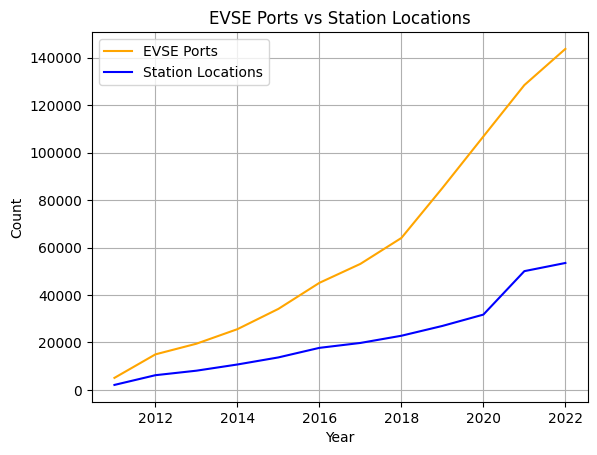

In [18]:
# Create the axis
years_x_axis = stations_data['Year']
evse_ports_y_axis = stations_data['EVSE Ports']
station_locations_y_axis = stations_data['Station Locations']

# Plotting the data
plt.plot(years_x_axis, evse_ports_y_axis, label='EVSE Ports', color='orange')
plt.plot(years_x_axis, station_locations_y_axis, label='Station Locations',     color='blue')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("EVSE Ports vs Station Locations")
plt.grid('on', which='major', axis='both')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText=True)
plt.legend()

plt.show()

In [5]:
#### BEV = Battery Electric Vehicle
### PHEV = Plug-in Hybrid Electric Vehicle  

In [6]:
world_ev_data = ev_sales_data.loc[ev_sales_data["region"] == "World"]
world_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
808,World,Historical,EV sales,Cars,BEV,2010,Vehicles,7200
809,World,Historical,EV sales,Cars,PHEV,2010,Vehicles,370
810,World,Historical,EV sales,Cars,PHEV,2011,Vehicles,9000
811,World,Historical,EV sales,Cars,BEV,2011,Vehicles,39000
812,World,Historical,EV sales,Cars,BEV,2012,Vehicles,58000


In [7]:
nworld_ev_data = ev_sales_data.loc[ev_sales_data["region"] != "World"]
nworld_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


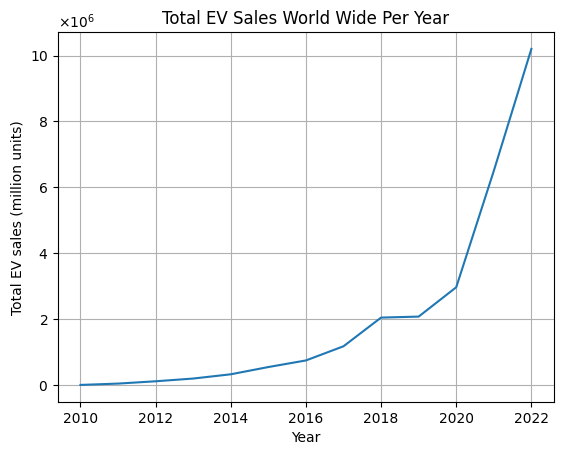

In [8]:
total_ev_sales = world_ev_data.groupby("year")["value"].sum()
total_ev_sales

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = total_ev_sales.index
sales_y_axis = total_ev_sales.values


plt.plot(years_x_axis, sales_y_axis)
plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total EV Sales World Wide Per Year")
plt.grid('on', which='major', axis='both')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.show()

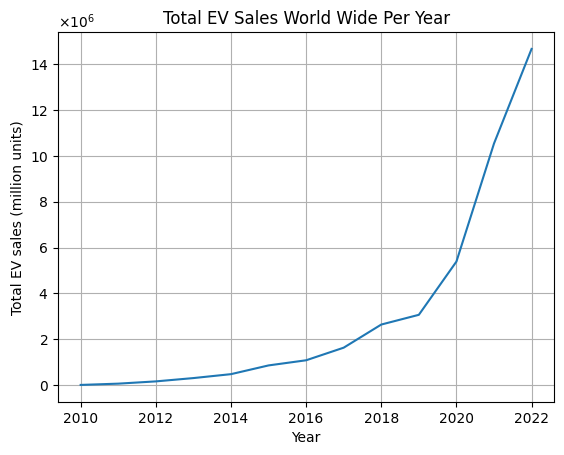

In [9]:
total_ev_sales = nworld_ev_data.groupby("year")["value"].sum()
total_ev_sales

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = total_ev_sales.index
sales_y_axis = total_ev_sales.values

plt.plot(years_x_axis, sales_y_axis)
plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total EV Sales World Wide Per Year")
plt.grid('on', which='major', axis='both')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.show()

In [10]:
usa_data = ev_sales_data.loc[ev_sales_data["region"] == "USA"]
usa_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
783,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200
784,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800
785,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000
786,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000
787,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000


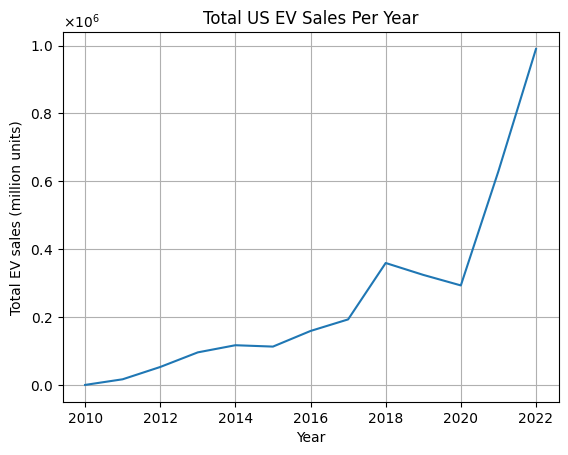

In [11]:
usa_graph = usa_data.groupby("year")["value"].sum()
usa_graph

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = usa_graph.index
sales_y_axis = usa_graph.values

plt.plot(years_x_axis, sales_y_axis)
plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total US EV Sales Per Year")
plt.grid('on', which='major', axis='both')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)

plt.show()

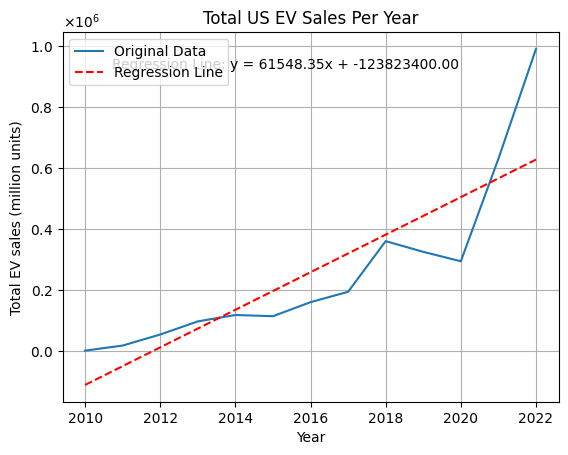

In [12]:
# Assuming you already have usa_graph defined
usa_graph = usa_data.groupby("year")["value"].sum()

# Creating a line plot to visualize the total data set grouped by year
years_x_axis = usa_graph.index
sales_y_axis = usa_graph.values

# Plotting the original data
plt.plot(years_x_axis, sales_y_axis, label='Original Data')

# Performing linear regression
coefficients = np.polyfit(years_x_axis, sales_y_axis, 1)
poly = np.poly1d(coefficients)
regression_line = poly(years_x_axis)

# Plotting the regression line
plt.plot(years_x_axis, regression_line, color='red', linestyle='--', label='Regression Line')

# Getting the equation of the regression line
m = coefficients[0]  # slope
b = coefficients[1]  # intercept
equation_text = f'Regression Line: y = {m:.2f}x + {b:.2f}'

# Plotting the equation text
plt.text(0.1, 0.9, equation_text, transform=plt.gca().transAxes, fontsize=10)

plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total US EV Sales Per Year")
plt.grid('on', which='major', axis='both')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText=True)
plt.legend()

plt.show()

In [13]:
usa_bev_data = usa_data.loc[usa_data["powertrain"] == "BEV"]
usa_bev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
783,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200
784,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800
787,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000
788,USA,Historical,EV sales,Cars,BEV,2013,Vehicles,48000
791,USA,Historical,EV sales,Cars,BEV,2014,Vehicles,63000


In [14]:
usa_phev_data = usa_data.loc[usa_data["powertrain"] == "PHEV"]
usa_phev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
785,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000
786,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000
789,USA,Historical,EV sales,Cars,PHEV,2013,Vehicles,49000
790,USA,Historical,EV sales,Cars,PHEV,2014,Vehicles,55000
793,USA,Historical,EV sales,Cars,PHEV,2015,Vehicles,43000


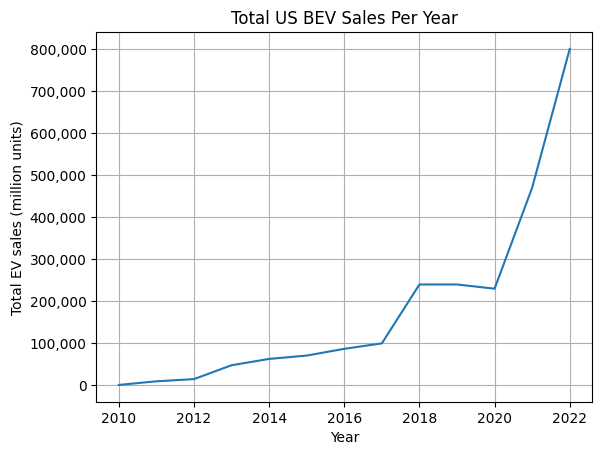

In [15]:
usa_bev_graph = usa_bev_data.groupby("year")["value"].sum()
usa_bev_graph

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = usa_bev_graph.index
sales_y_axis = usa_bev_graph.values

plt.plot(years_x_axis, sales_y_axis)
plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total US BEV Sales Per Year")
plt.grid('on', which='major', axis='both')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

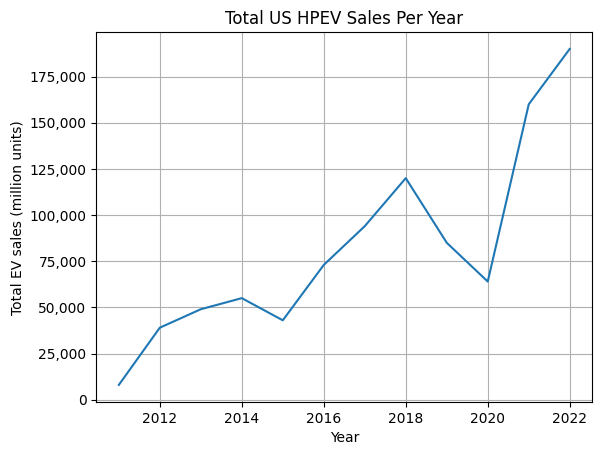

In [16]:
usa_phev_graph = usa_phev_data.groupby("year")["value"].sum()
usa_phev_graph

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = usa_phev_graph.index
sales_y_axis = usa_phev_graph.values

plt.plot(years_x_axis, sales_y_axis)
plt.xlabel("Year")
plt.ylabel("Total EV sales (million units)")
plt.title("Total US HPEV Sales Per Year")
plt.grid('on', which='major', axis='both')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()